In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE,SequentialFeatureSelector
from tqdm import tqdm
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import ADASYN
from xgboost import XGBClassifier
from sklearn.base import clone
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
    
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier,StackingClassifier,AdaBoostClassifier,RandomForestClassifier
rs = 0

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, plot_confusion_matrix,f1_score,precision_score,recall_score,RocCurveDisplay,PrecisionRecallDisplay

In [2]:
processed_adasyn_train_data = pd.read_csv("processed_adasyn_train_data.csv")
processed_adasyn_train_data_trX = processed_adasyn_train_data.drop(columns=["class"],axis=1)
processed_adasyn_train_data_trY = processed_adasyn_train_data["class"]

In [3]:
processed_test_data = pd.read_csv("Processed_test_data.csv")
processed_test_data_X = processed_test_data.drop(columns=["class"],axis=1)
processed_test_data_Y = processed_test_data["class"]

In [4]:
#Function to obtain different metrics based on predicted class labels
def print_metrics(y_test,y_pred,name):
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted Labels")
    plt.ylabel("Actual Labels")
    plt.title("Confusion Matrix Obtained")
    plt.show();
    accuracy_value = round(accuracy_score(y_test,y_pred),4)
    f1_value = round(f1_score(y_test,y_pred,labels=np.unique(y_pred)),4) 
    prec = round(precision_score(y_test,y_pred,labels=np.unique(y_pred)),4)
    rec = round(recall_score(y_test,y_pred,labels=np.unique(y_pred)),4)
    print("Accuarcy value obtained is ",accuracy_value)
    print("F1-score obtained is ",f1_value)
    print("Precision obtained is ",prec)
    print("Recall obtained is ",rec)
    roc_display = RocCurveDisplay.from_predictions(y_test,y_pred,name=name)
    _ = roc_display.ax_.set_title("ROC curve")
    pr_display = PrecisionRecallDisplay.from_predictions(y_test, y_pred, name=name)
    _ = pr_display.ax_.set_title("Precision-Recall curve")
    return [accuracy_value,f1_value,prec,rec]

In [5]:
best_results_table = []

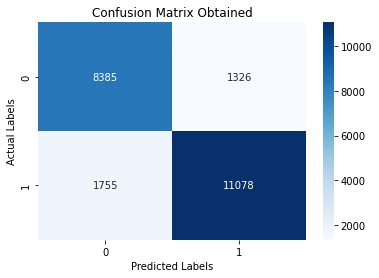

Accuarcy value obtained is  0.8633
F1-score obtained is  0.8779
Precision obtained is  0.8931
Recall obtained is  0.8632


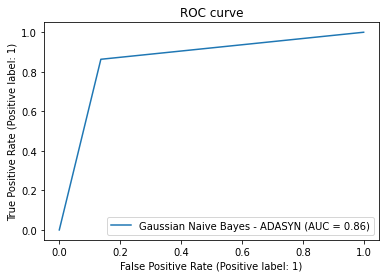

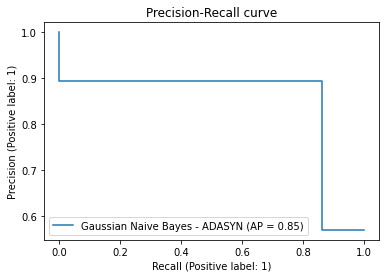

In [7]:
gnb = GaussianNB()
pca = PCA(n_components=19,random_state=rs)
gnb_pca_pipeline = Pipeline([('pca', pca), ('gnb', gnb)])
gnb_pca_pipeline.fit(processed_adasyn_train_data_trX,processed_adasyn_train_data_trY)
gnb_pca_pipeline_yPred = gnb_pca_pipeline.predict(processed_test_data_X)
gnb_list = ["Gaussian Naive Bayes - ADASYN after Hyperparameter Tuning and Feature Selection based on PCA"]
gnb_list.extend(print_metrics(processed_test_data_Y, gnb_pca_pipeline_yPred,"Gaussian Naive Bayes - ADASYN"))
best_results_table.append(gnb_list)

In [8]:
import pickle
pickle.dump(gnb_pca_pipeline, open('gnb_pca_pipeline.pkl', 'wb'))

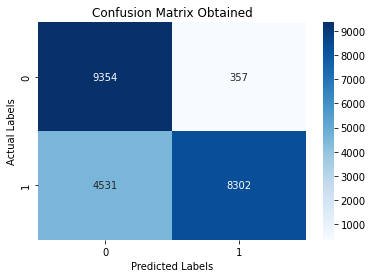

Accuarcy value obtained is  0.7832
F1-score obtained is  0.7726
Precision obtained is  0.9588
Recall obtained is  0.6469


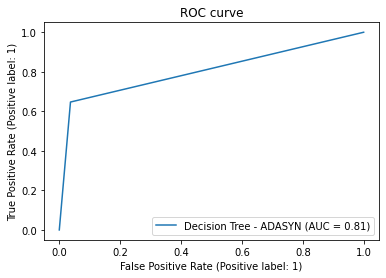

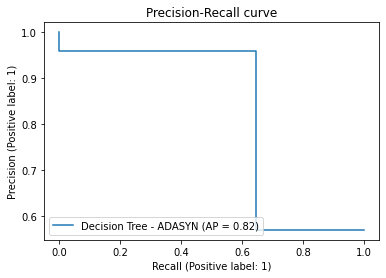

In [11]:
dt = DecisionTreeClassifier(criterion='entropy', max_depth=20, min_samples_leaf=5,random_state=0)
pca = PCA(n_components=35,random_state=rs)
dt_pca_pipeline = Pipeline([('pca', pca), ('dt', dt)])
dt_pca_pipeline.fit(processed_adasyn_train_data_trX,processed_adasyn_train_data_trY)
dt_pca_pipeline_yPred = dt_pca_pipeline.predict(processed_test_data_X)
dt_list = ["Decision Tree - ADASYN after Hyperparameter Tuning and Feature Selection based on PCA"]
dt_list.extend(print_metrics(processed_test_data_Y, dt_pca_pipeline_yPred,"Decision Tree - ADASYN"))
best_results_table.append(dt_list)

In [12]:
pickle.dump(dt_pca_pipeline, open('dt_pca_pipeline.pkl', 'wb'))

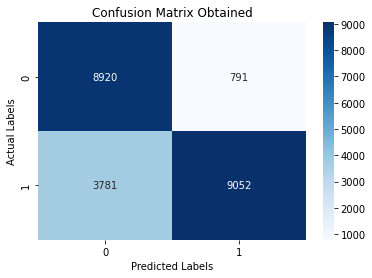

Accuarcy value obtained is  0.7972
F1-score obtained is  0.7984
Precision obtained is  0.9196
Recall obtained is  0.7054


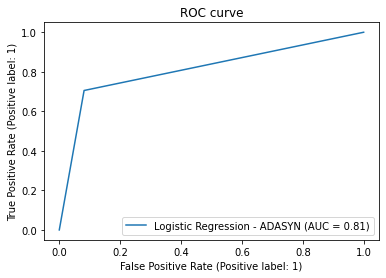

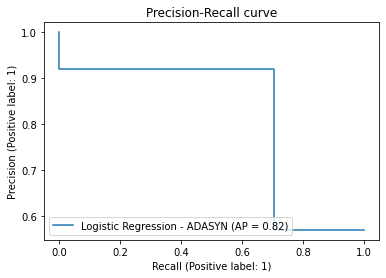

In [13]:
logreg = LogisticRegression(C=0.012742749857031334, max_iter=1000, penalty='l1', random_state=0, solver='liblinear')
pca = PCA(n_components=26,random_state=rs)
logreg_pca_pipeline = Pipeline([('pca', pca), ('logreg', logreg)])
logreg_pca_pipeline.fit(processed_adasyn_train_data_trX,processed_adasyn_train_data_trY)
logreg_pca_pipeline_yPred = logreg_pca_pipeline.predict(processed_test_data_X)
logreg_list = ["Logistic Regression - ADASYN after Hyperparameter Tuning and Feature Selection based on PCA"]
logreg_list.extend(print_metrics(processed_test_data_Y, logreg_pca_pipeline_yPred,"Logistic Regression - ADASYN"))
best_results_table.append(logreg_list)

In [14]:
pickle.dump(logreg_pca_pipeline, open('logreg_pca_pipeline.pkl', 'wb'))

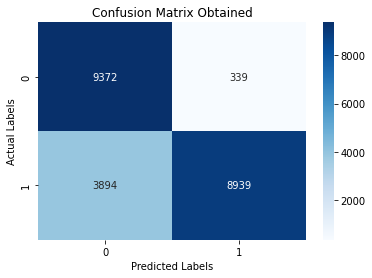

Accuarcy value obtained is  0.8122
F1-score obtained is  0.8086
Precision obtained is  0.9635
Recall obtained is  0.6966


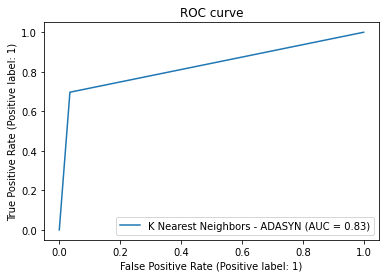

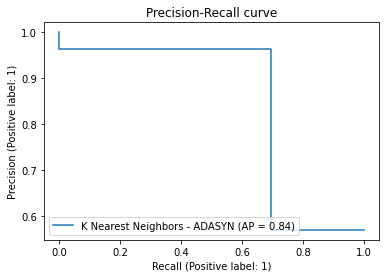

In [16]:
knn = KNeighborsClassifier(n_neighbors=1)
pca = PCA(n_components=31,random_state=rs)
knn_pca_pipeline = Pipeline([('pca', pca), ('knn', knn)])
knn_pca_pipeline.fit(processed_adasyn_train_data_trX,processed_adasyn_train_data_trY)
knn_pca_pipeline_yPred = knn_pca_pipeline.predict(processed_test_data_X)
knn_list = ["K Nearest Neighbors - ADASYN after Hyperparameter Tuning and Feature Selection based on PCA"]
knn_list.extend(print_metrics(processed_test_data_Y, knn_pca_pipeline_yPred,"K Nearest Neighbors - ADASYN"))
best_results_table.append(knn_list)

In [17]:
pickle.dump(knn_pca_pipeline, open('knn_pca_pipeline.pkl', 'wb'))

In [18]:
#Tabulating the obtained results and displaying the results by formatting
baselearners_df = pd.DataFrame(best_results_table, columns = ["Classifier","accuracy","f1-score","Precision","Recall"])
with pd.option_context('display.precision', 4):
    formatted_table=(baselearners_df.style.background_gradient(cmap ='RdYlGn'))
formatted_table

,Classifier,accuracy,f1-score,Precision,Recall
0,Gaussian Naive Bayes - ADASYN after Hyperparameter Tuning and Feature Selection based on PCA,0.8633,0.8779,0.8931,0.8632
1,Decision Tree - ADASYN after Hyperparameter Tuning and Feature Selection based on PCA,0.7832,0.7726,0.9588,0.6469
2,Logistic Regression - ADASYN after Hyperparameter Tuning and Feature Selection based on PCA,0.7972,0.7984,0.9196,0.7054
3,K Nearest Neighbors - ADASYN after Hyperparameter Tuning and Feature Selection based on PCA,0.8122,0.8086,0.9635,0.6966


In [19]:
stack_estimators = [gnb_pca_pipeline,dt_pca_pipeline,logreg_pca_pipeline,knn_pca_pipeline]
stack_estimators = {str(model)+"_pipeline" : estimator for estimator, model in zip(stack_estimators,["gnb","dt","logreg","knn"])}
print(stack_estimators)

{'gnb_pipeline': Pipeline(steps=[('pca', PCA(n_components=19, random_state=0)),
                ('gnb', GaussianNB())]), 'dt_pipeline': Pipeline(steps=[('pca', PCA(n_components=35, random_state=0)),
                ('dt',
                 DecisionTreeClassifier(criterion='entropy', max_depth=20,
                                        min_samples_leaf=5, random_state=0))]), 'logreg_pipeline': Pipeline(steps=[('pca', PCA(n_components=26, random_state=0)),
                ('logreg',
                 LogisticRegression(C=0.012742749857031334, max_iter=1000,
                                    penalty='l1', random_state=0,
                                    solver='liblinear'))]), 'knn_pipeline': Pipeline(steps=[('pca', PCA(n_components=31, random_state=0)),
                ('knn', KNeighborsClassifier(n_neighbors=1))])}


In [20]:
stack_results = dict()
stack_results_table = []

Results when Random Forest is used as Stacking Classifier


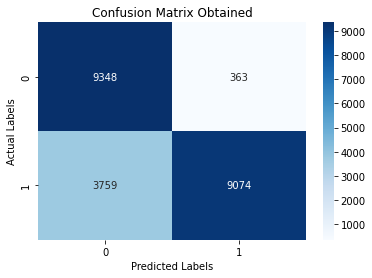

Accuarcy value obtained is  0.8172
F1-score obtained is  0.8149
Precision obtained is  0.9615
Recall obtained is  0.7071


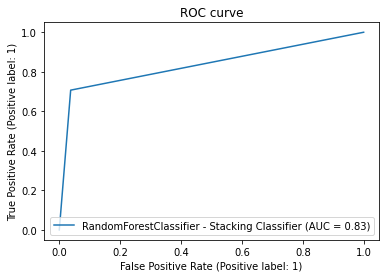

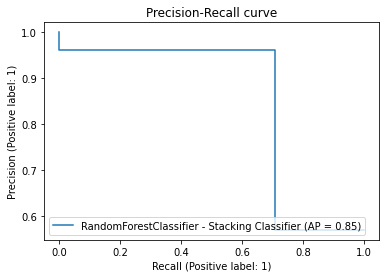

In [21]:
for model,model_name in zip([RandomForestClassifier(random_state=rs)],["Random Forest"]):
    stacking = StackingClassifier([(estName, clone(est)) for estName, est in stack_estimators.items()], model)
    stacking.fit(processed_adasyn_train_data_trX, processed_adasyn_train_data_trY)
    stack_results[f'{model.__class__.__name__}'+"_yPred"] = stacking.predict(processed_test_data_X)
    stack_list = [f'{model.__class__.__name__}'+" - Stacking Classifier"]
    print("Results when {} is used as Stacking Classifier".format(model_name))
    stack_list.extend(print_metrics(processed_test_data_Y, stack_results[f'{model.__class__.__name__}'+"_yPred"], f'{model.__class__.__name__}'+" - Stacking Classifier"))
    stack_results_table.append(stack_list)

In [22]:
pickle.dump(stacking, open('randomforest_pca_stackingclassifier.pkl', 'wb'))

Results when AdaBoost is used as Stacking Classifier


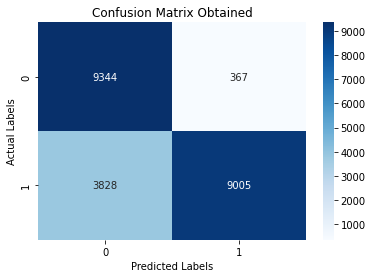

Accuarcy value obtained is  0.8139
F1-score obtained is  0.8111
Precision obtained is  0.9608
Recall obtained is  0.7017


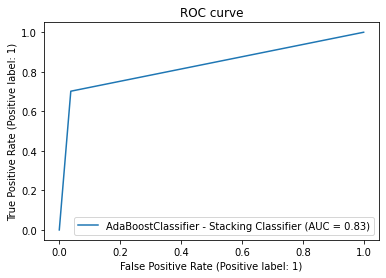

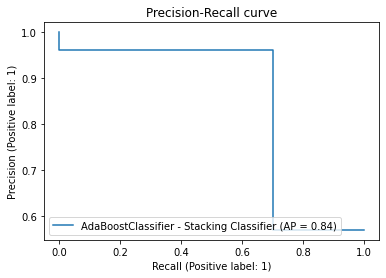

In [23]:
for model,model_name in zip([AdaBoostClassifier(random_state = rs)],["AdaBoost"]):
    stacking = StackingClassifier([(estName, clone(est)) for estName, est in stack_estimators.items()], model)
    stacking.fit(processed_adasyn_train_data_trX, processed_adasyn_train_data_trY)
    stack_results[f'{model.__class__.__name__}'+"_yPred"] = stacking.predict(processed_test_data_X)
    stack_list = [f'{model.__class__.__name__}'+" - Stacking Classifier"]
    print("Results when {} is used as Stacking Classifier".format(model_name))
    stack_list.extend(print_metrics(processed_test_data_Y, stack_results[f'{model.__class__.__name__}'+"_yPred"], f'{model.__class__.__name__}'+" - Stacking Classifier"))
    stack_results_table.append(stack_list)

In [24]:
pickle.dump(stacking, open('adaboost_pca_stackingclassifier.pkl', 'wb'))

[00:18:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Results when XGBoost is used as Stacking Classifier


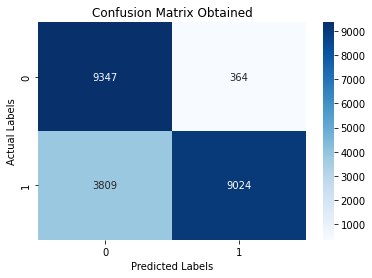

Accuarcy value obtained is  0.8149
F1-score obtained is  0.8122
Precision obtained is  0.9612
Recall obtained is  0.7032


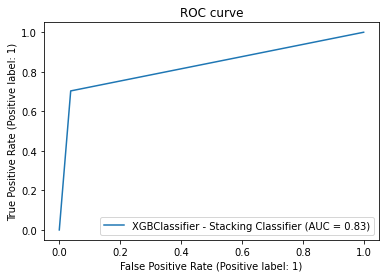

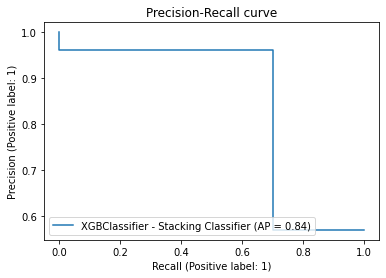

In [25]:
for model,model_name in zip([XGBClassifier(objective="binary:logistic", random_state=rs)],["XGBoost"]):
    stacking = StackingClassifier([(estName, clone(est)) for estName, est in stack_estimators.items()], model)
    stacking.fit(processed_adasyn_train_data_trX, processed_adasyn_train_data_trY)
    stack_results[f'{model.__class__.__name__}'+"_yPred"] = stacking.predict(processed_test_data_X)
    stack_list = [f'{model.__class__.__name__}'+" - Stacking Classifier"]
    print("Results when {} is used as Stacking Classifier".format(model_name))
    stack_list.extend(print_metrics(processed_test_data_Y, stack_results[f'{model.__class__.__name__}'+"_yPred"], f'{model.__class__.__name__}'+" - Stacking Classifier"))
    stack_results_table.append(stack_list)

In [26]:
pickle.dump(stacking, open('xgboost_pca_stackingclassifier.pkl', 'wb'))

Results when Gradient-Boosted Decision Tree is used as Stacking Classifier


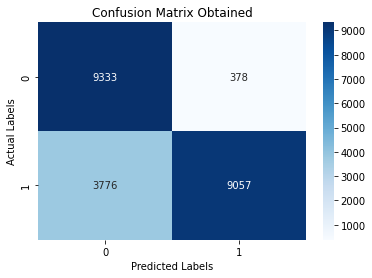

Accuarcy value obtained is  0.8157
F1-score obtained is  0.8135
Precision obtained is  0.9599
Recall obtained is  0.7058


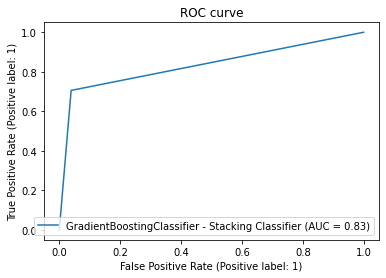

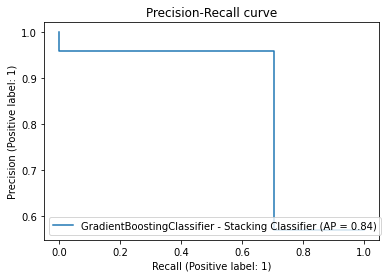

In [27]:
for model,model_name in zip([GradientBoostingClassifier(random_state = rs)],["Gradient-Boosted Decision Tree"]):
    stacking = StackingClassifier([(estName, clone(est)) for estName, est in stack_estimators.items()], model)
    stacking.fit(processed_adasyn_train_data_trX, processed_adasyn_train_data_trY)
    stack_results[f'{model.__class__.__name__}'+"_yPred"] = stacking.predict(processed_test_data_X)
    stack_list = [f'{model.__class__.__name__}'+" - Stacking Classifier"]
    print("Results when {} is used as Stacking Classifier".format(model_name))
    stack_list.extend(print_metrics(processed_test_data_Y, stack_results[f'{model.__class__.__name__}'+"_yPred"], f'{model.__class__.__name__}'+" - Stacking Classifier"))
    stack_results_table.append(stack_list)

In [28]:
pickle.dump(stacking, open('gbdt_pca_stackingclassifier.pkl', 'wb'))

In [29]:
stack_results_table

[['RandomForestClassifier - Stacking Classifier',
  0.8172,
  0.8149,
  0.9615,
  0.7071],
 ['AdaBoostClassifier - Stacking Classifier', 0.8139, 0.8111, 0.9608, 0.7017],
 ['XGBClassifier - Stacking Classifier', 0.8149, 0.8122, 0.9612, 0.7032],
 ['GradientBoostingClassifier - Stacking Classifier',
  0.8157,
  0.8135,
  0.9599,
  0.7058]]

In [30]:
#Tabulating the obtained results and displaying the results by formatting
stackingclassifiers_df = pd.DataFrame(stack_results_table, columns = ["Classifier","accuracy","f1-score","Precision","Recall"])
with pd.option_context('display.precision', 4):
    formatted_table=(stackingclassifiers_df.style.background_gradient(cmap ='RdYlGn'))
formatted_table

,Classifier,accuracy,f1-score,Precision,Recall
0,RandomForestClassifier - Stacking Classifier,0.8172,0.8149,0.9615,0.7071
1,AdaBoostClassifier - Stacking Classifier,0.8139,0.8111,0.9608,0.7017
2,XGBClassifier - Stacking Classifier,0.8149,0.8122,0.9612,0.7032
3,GradientBoostingClassifier - Stacking Classifier,0.8157,0.8135,0.9599,0.7058


In [31]:
stack_results

{'RandomForestClassifier_yPred': array([1, 1, 0, ..., 1, 0, 1], dtype=int64),
 'AdaBoostClassifier_yPred': array([1, 1, 0, ..., 1, 0, 1], dtype=int64),
 'XGBClassifier_yPred': array([1, 1, 0, ..., 1, 0, 1], dtype=int64),
 'GradientBoostingClassifier_yPred': array([1, 1, 0, ..., 1, 0, 1], dtype=int64)}

Logical OR between Stacking Classifiers followed by deriving threshold for Voting

In [32]:
def utility_logical_or(col_a, col_b):
    output = []
    for a, b in zip(col_a, col_b):
        if (a + b >= 1):
            output.append(1)
        else:
            output.append(0)
    return output

In [33]:
randomforest_pca_stackingclassifier = pickle.load(open('randomforest_pca_stackingclassifier.pkl', 'rb'))
adaboost_pca_stackingclassifier = pickle.load(open('adaboost_pca_stackingclassifier.pkl', 'rb'))
xgboost_pca_stackingclassifier = pickle.load(open('xgboost_pca_stackingclassifier.pkl', 'rb'))
gbdt_pca_stackingclassifier = pickle.load(open('gbdt_pca_stackingclassifier.pkl', 'rb'))

train_predictions_ind_pca_or_df = pd.DataFrame()
train_predictions_ind_pca_or_df["Naive Bayes - Base Learner"] = gnb_pca_pipeline.predict(processed_adasyn_train_data_trX)
train_predictions_ind_pca_or_df["Decision Tree - Base Learner"] = dt_pca_pipeline.predict(processed_adasyn_train_data_trX)
train_predictions_ind_pca_or_df["Logistic Regression - Base Learner"] = logreg_pca_pipeline.predict(processed_adasyn_train_data_trX)
train_predictions_ind_pca_or_df["K Nearest Neighbors - Base Learner"] = knn_pca_pipeline.predict(processed_adasyn_train_data_trX)
train_predictions_ind_pca_or_df["Random Forest - Stacking Classifier"] = randomforest_pca_stackingclassifier.predict(processed_adasyn_train_data_trX)
train_predictions_ind_pca_or_df["AdaBoost - Stacking Classifier"] = adaboost_pca_stackingclassifier.predict(processed_adasyn_train_data_trX)
train_predictions_ind_pca_or_df["XGBoost - Stacking Classifier"] = xgboost_pca_stackingclassifier.predict(processed_adasyn_train_data_trX)
train_predictions_ind_pca_or_df["Gradient-Boosted Decision Tree - Stacking Classifier"] = gbdt_pca_stackingclassifier.predict(processed_adasyn_train_data_trX)
train_predictions_ind_pca_or_df["RF OR AdaBoost"] = utility_logical_or(train_predictions_ind_pca_or_df["Random Forest - Stacking Classifier"].values,train_predictions_ind_pca_or_df["AdaBoost - Stacking Classifier"].values)
train_predictions_ind_pca_or_df["RF OR XGBoost"] = utility_logical_or(train_predictions_ind_pca_or_df["Random Forest - Stacking Classifier"].values,train_predictions_ind_pca_or_df["XGBoost - Stacking Classifier"].values)
train_predictions_ind_pca_or_df["RF OR GBDT"] = utility_logical_or(train_predictions_ind_pca_or_df["Random Forest - Stacking Classifier"].values,train_predictions_ind_pca_or_df["Gradient-Boosted Decision Tree - Stacking Classifier"].values)
train_predictions_ind_pca_or_df["AdaBoost OR XGBoost"] = utility_logical_or(train_predictions_ind_pca_or_df["AdaBoost - Stacking Classifier"].values,train_predictions_ind_pca_or_df["XGBoost - Stacking Classifier"].values)
train_predictions_ind_pca_or_df["AdaBoost OR GBDT"] = utility_logical_or(train_predictions_ind_pca_or_df["AdaBoost - Stacking Classifier"].values,train_predictions_ind_pca_or_df["Gradient-Boosted Decision Tree - Stacking Classifier"].values)
train_predictions_ind_pca_or_df["XGBoost OR GBDT"] = utility_logical_or(train_predictions_ind_pca_or_df["XGBoost - Stacking Classifier"].values,train_predictions_ind_pca_or_df["Gradient-Boosted Decision Tree - Stacking Classifier"].values)

In [34]:
train_predictions_ind_pca_or_df

,Naive Bayes - Base Learner,Decision Tree - Base Learner,Logistic Regression - Base Learner,K Nearest Neighbors - Base Learner,Random Forest - Stacking Classifier,AdaBoost - Stacking Classifier,XGBoost - Stacking Classifier,Gradient-Boosted Decision Tree - Stacking Classifier,RF OR AdaBoost,RF OR XGBoost,RF OR GBDT,AdaBoost OR XGBoost,AdaBoost OR GBDT,XGBoost OR GBDT
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1,1,1,1,1,1,1,1,1,1,1,1,1,1
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129736,1,1,1,1,1,1,1,1,1,1,1,1,1,1
129737,1,1,1,1,1,1,1,1,1,1,1,1,1,1
129738,1,1,1,1,1,1,1,1,1,1,1,1,1,1
129739,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [35]:
train_predictions_ind_pca_or_df["sum_predictions"] = train_predictions_ind_pca_or_df.sum(axis=1)

100%|██████████| 14/14 [00:02<00:00,  5.99it/s]


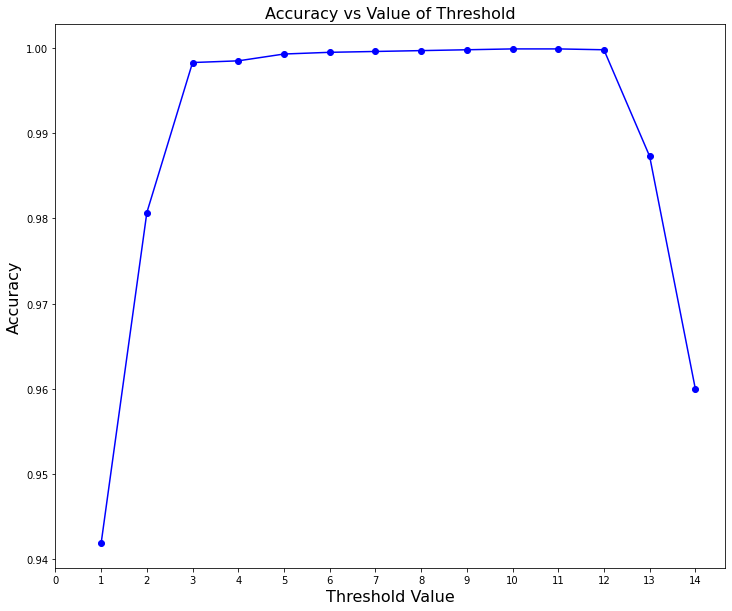

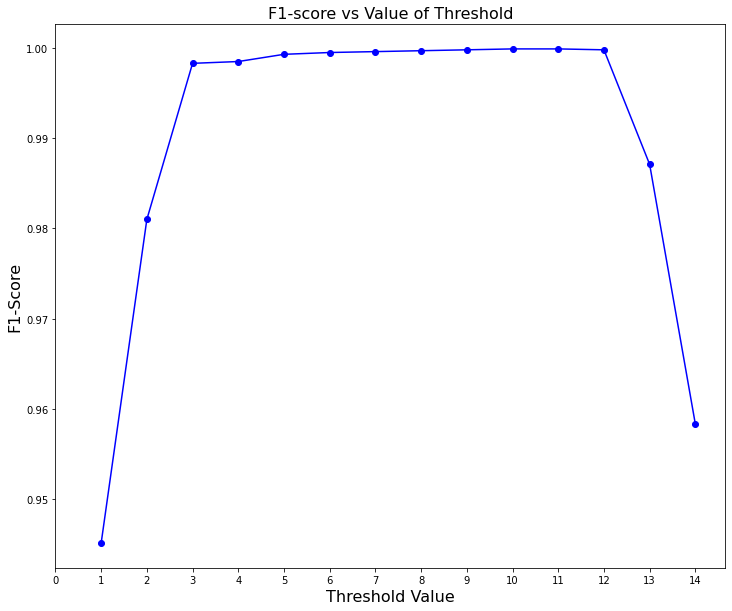

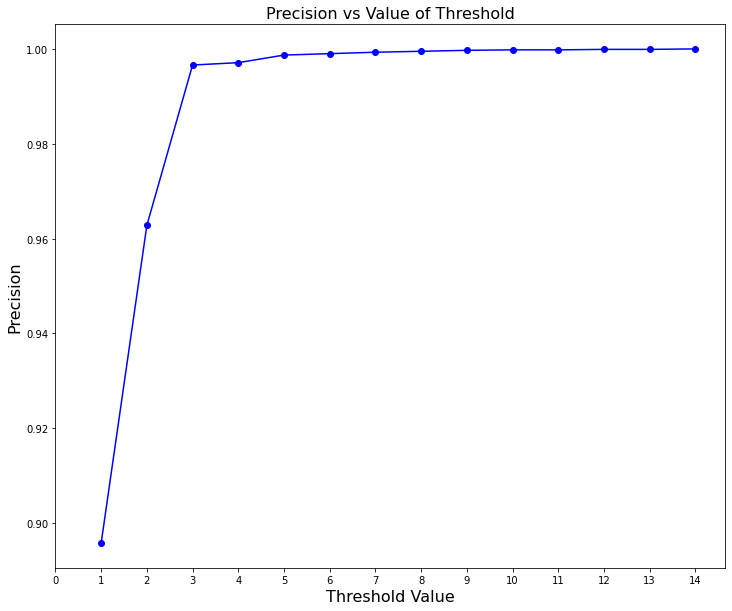

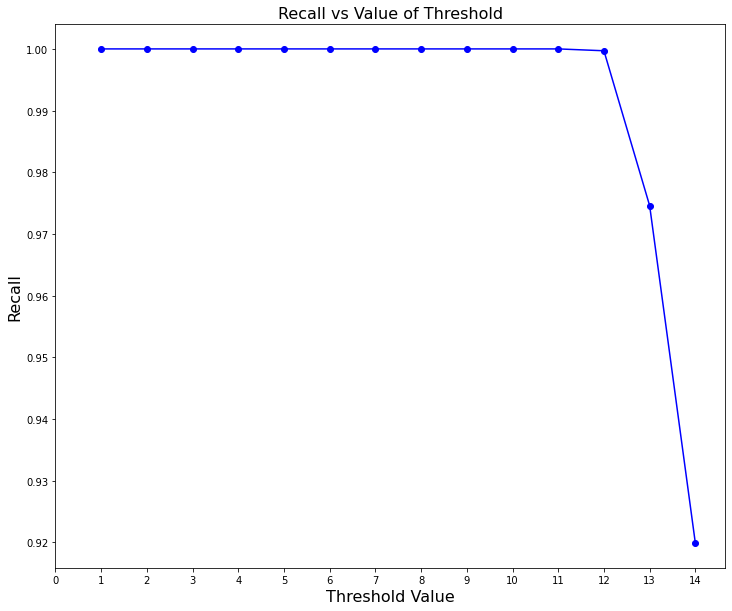

Maximum accuracy obtained is 0.9999 for the threshold value = 10
Maximum f1-score obtained is 0.9999 for the threshold value = 10
Maximum precision obtained is 1.0 for the threshold value = 14
Maximum recall obtained is 1.0 for the threshold value = 1


In [36]:
acc_dict = {}
f1_dict = {}
prec_dict = {}
recall_dict = {}
for threshold in tqdm(range(1,15)):
    acc_val = []
    f1_val = []
    prec_val = []
    recall_val = []
    yPred = train_predictions_ind_pca_or_df["sum_predictions"].apply(lambda x:1 if (x>=threshold) else 0)
    acc_dict[threshold] = round(accuracy_score(processed_adasyn_train_data_trY,yPred),4)
    f1_dict[threshold] = round(f1_score(processed_adasyn_train_data_trY,yPred,labels=np.unique(yPred)),4) 
    prec_dict[threshold] = round(precision_score(processed_adasyn_train_data_trY,yPred,labels=np.unique(yPred)),4)
    recall_dict[threshold] = round(recall_score(processed_adasyn_train_data_trY,yPred,labels=np.unique(yPred)),4)
    
plt.figure(figsize=(12,10))
plt.plot(*zip(*sorted(acc_dict.items())),color='blue',marker='o')
Title = "Accuracy vs Value of Threshold"
plt.title(Title, fontsize=16)
plt.xticks(range(0,15))
plt.xlabel("Threshold Value", fontsize=16)
plt.ylabel("Accuracy", fontsize=16)
plt.show();

plt.figure(figsize=(12,10))
plt.plot(*zip(*sorted(f1_dict.items())),color='blue',marker='o')
Title = "F1-score vs Value of Threshold"
plt.title(Title, fontsize=16)
plt.xticks(range(0,15))
plt.xlabel("Threshold Value", fontsize=16)
plt.ylabel("F1-Score", fontsize=16)
plt.show();


plt.figure(figsize=(12,10))
plt.plot(*zip(*sorted(prec_dict.items())),color='blue',marker='o')
Title = "Precision vs Value of Threshold"
plt.title(Title, fontsize=16)
plt.xticks(range(0,15))
plt.xlabel("Threshold Value", fontsize=16)
plt.ylabel("Precision", fontsize=16)
plt.show();

plt.figure(figsize=(12,10))
plt.plot(*zip(*sorted(recall_dict.items())),color='blue',marker='o')
Title = "Recall vs Value of Threshold"
plt.title(Title, fontsize=16)
plt.xticks(range(0,15))
plt.xlabel("Threshold Value", fontsize=16)
plt.ylabel("Recall", fontsize=16)
plt.show();

max_acc = max(acc_dict.values())
max_acc_threshold =  max(acc_dict, key=acc_dict.get)

max_f1 = max(f1_dict.values())
max_f1_threshold=  max(f1_dict, key=f1_dict.get)

max_precision = max(prec_dict.values())
max_prec_threshold = max(prec_dict, key=prec_dict.get)

max_recall = max(recall_dict.values())
max_recall_threshold = max(recall_dict, key=recall_dict.get)


print("Maximum accuracy obtained is {} for the threshold value = {}".format(max_acc,max_acc_threshold))
print("Maximum f1-score obtained is {} for the threshold value = {}".format(max_f1,max_f1_threshold))
print("Maximum precision obtained is {} for the threshold value = {}".format(max_precision,max_prec_threshold))
print("Maximum recall obtained is {} for the threshold value = {}".format(max_recall,max_recall_threshold))

In [37]:
threshold = 1
print("Accuracy at threshold value {} is {}".format(threshold,acc_dict[threshold]))
print("F1-Score at threshold value {} is {}".format(threshold,f1_dict[threshold]))
print("Precision at threshold value {} is {}".format(threshold,prec_dict[threshold]))
print("Recall at threshold value {} is {}".format(threshold,recall_dict[threshold]))

Accuracy at threshold value 1 is 0.9419
F1-Score at threshold value 1 is 0.9451
Precision at threshold value 1 is 0.8958
Recall at threshold value 1 is 1.0


In [38]:
threshold = 10
print("Accuracy at threshold value {} is {}".format(threshold,acc_dict[threshold]))
print("F1-Score at threshold value {} is {}".format(threshold,f1_dict[threshold]))
print("Precision at threshold value {} is {}".format(threshold,prec_dict[threshold]))
print("Recall at threshold value {} is {}".format(threshold,recall_dict[threshold]))

Accuracy at threshold value 10 is 0.9999
F1-Score at threshold value 10 is 0.9999
Precision at threshold value 10 is 0.9998
Recall at threshold value 10 is 1.0


In [39]:
threshold = 14
print("Accuracy at threshold value {} is {}".format(threshold,acc_dict[threshold]))
print("F1-Score at threshold value {} is {}".format(threshold,f1_dict[threshold]))
print("Precision at threshold value {} is {}".format(threshold,prec_dict[threshold]))
print("Recall at threshold value {} is {}".format(threshold,recall_dict[threshold]))

Accuracy at threshold value 14 is 0.96
F1-Score at threshold value 14 is 0.9583
Precision at threshold value 14 is 1.0
Recall at threshold value 14 is 0.9199


In [40]:
test_predictions_ind_pca_or_df = pd.DataFrame()
test_predictions_ind_pca_or_df["Naive Bayes - Base Learner"] = gnb_pca_pipeline_yPred
test_predictions_ind_pca_or_df["Decision Tree - Base Learner"] = dt_pca_pipeline_yPred
test_predictions_ind_pca_or_df["Logistic Regression - Base Learner"] = logreg_pca_pipeline_yPred
test_predictions_ind_pca_or_df["K Nearest Neighbors - Base Learner"] = knn_pca_pipeline_yPred
test_predictions_ind_pca_or_df["Random Forest - Stacking Classifier"] = stack_results["RandomForestClassifier_yPred"]
test_predictions_ind_pca_or_df["AdaBoost - Stacking Classifier"] = stack_results["AdaBoostClassifier_yPred"]
test_predictions_ind_pca_or_df["XGBoost - Stacking Classifier"] = stack_results["XGBClassifier_yPred"]
test_predictions_ind_pca_or_df["Gradient-Boosted Decision Tree - Stacking Classifier"] = stack_results["GradientBoostingClassifier_yPred"]
test_predictions_ind_pca_or_df["RF OR AdaBoost"] = utility_logical_or(test_predictions_ind_pca_or_df["Random Forest - Stacking Classifier"].values,test_predictions_ind_pca_or_df["AdaBoost - Stacking Classifier"].values)
test_predictions_ind_pca_or_df["RF OR XGBoost"] = utility_logical_or(test_predictions_ind_pca_or_df["Random Forest - Stacking Classifier"].values,test_predictions_ind_pca_or_df["XGBoost - Stacking Classifier"].values)
test_predictions_ind_pca_or_df["RF OR GBDT"] = utility_logical_or(test_predictions_ind_pca_or_df["Random Forest - Stacking Classifier"].values,test_predictions_ind_pca_or_df["Gradient-Boosted Decision Tree - Stacking Classifier"].values)
test_predictions_ind_pca_or_df["AdaBoost OR XGBoost"] = utility_logical_or(test_predictions_ind_pca_or_df["AdaBoost - Stacking Classifier"].values,test_predictions_ind_pca_or_df["XGBoost - Stacking Classifier"].values)
test_predictions_ind_pca_or_df["AdaBoost OR GBDT"] = utility_logical_or(test_predictions_ind_pca_or_df["AdaBoost - Stacking Classifier"].values,test_predictions_ind_pca_or_df["Gradient-Boosted Decision Tree - Stacking Classifier"].values)
test_predictions_ind_pca_or_df["XGBoost OR GBDT"] = utility_logical_or(test_predictions_ind_pca_or_df["XGBoost - Stacking Classifier"].values,test_predictions_ind_pca_or_df["Gradient-Boosted Decision Tree - Stacking Classifier"].values)

In [41]:
test_predictions_ind_pca_or_df["sum_predictions"] = test_predictions_ind_pca_or_df.sum(axis=1)

In [42]:
or_logic_stacking_table = []

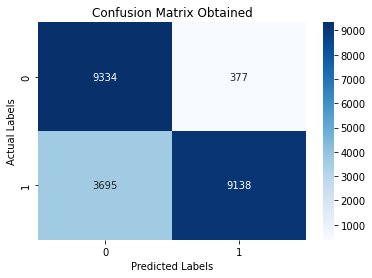

Accuarcy value obtained is  0.8194
F1-score obtained is  0.8178
Precision obtained is  0.9604
Recall obtained is  0.7121


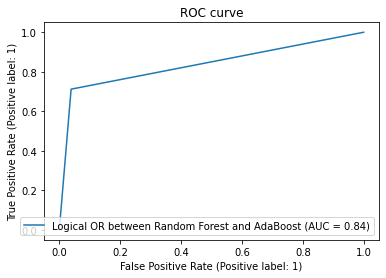

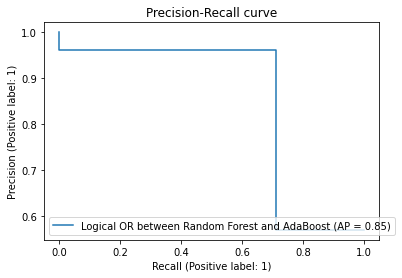

In [43]:
text = "Logical OR between Random Forest and AdaBoost"
or_logic_stacking_list = [text]
or_logic_stacking_list.extend(print_metrics(processed_test_data_Y,test_predictions_ind_pca_or_df["RF OR AdaBoost"].values,text))
or_logic_stacking_table.append(or_logic_stacking_list)

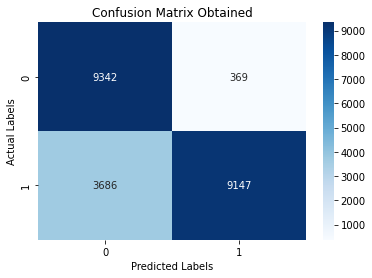

Accuarcy value obtained is  0.8201
F1-score obtained is  0.8186
Precision obtained is  0.9612
Recall obtained is  0.7128


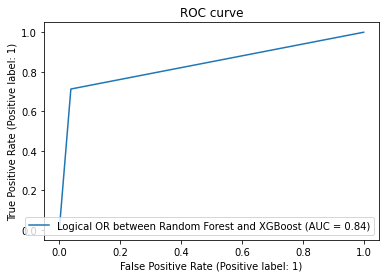

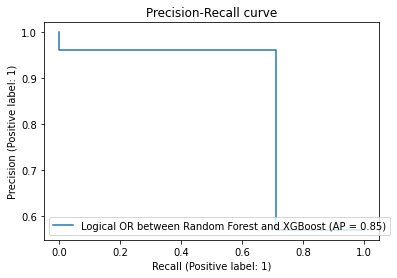

In [44]:
text = "Logical OR between Random Forest and XGBoost"
or_logic_stacking_list = [text]
or_logic_stacking_list.extend(print_metrics(processed_test_data_Y,test_predictions_ind_pca_or_df["RF OR XGBoost"].values,text))
or_logic_stacking_table.append(or_logic_stacking_list)

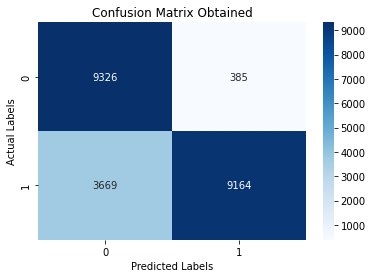

Accuarcy value obtained is  0.8202
F1-score obtained is  0.8189
Precision obtained is  0.9597
Recall obtained is  0.7141


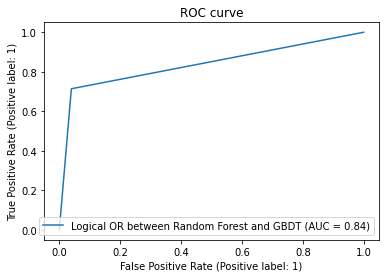

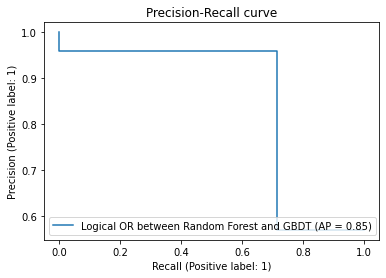

In [45]:
text = "Logical OR between Random Forest and GBDT"
or_logic_stacking_list = [text]
or_logic_stacking_list.extend(print_metrics(processed_test_data_Y,test_predictions_ind_pca_or_df["RF OR GBDT"].values,text))
or_logic_stacking_table.append(or_logic_stacking_list)

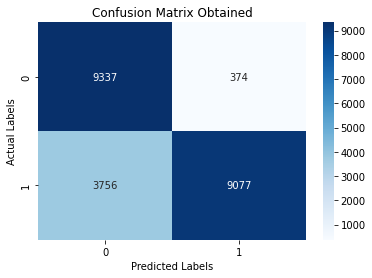

Accuarcy value obtained is  0.8168
F1-score obtained is  0.8147
Precision obtained is  0.9604
Recall obtained is  0.7073


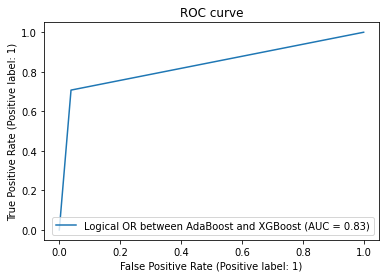

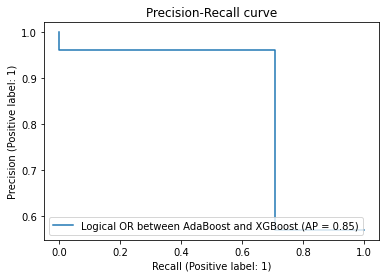

In [46]:
text = "Logical OR between AdaBoost and XGBoost"
or_logic_stacking_list = [text]
or_logic_stacking_list.extend(print_metrics(processed_test_data_Y,test_predictions_ind_pca_or_df["AdaBoost OR XGBoost"].values,text))
or_logic_stacking_table.append(or_logic_stacking_list)

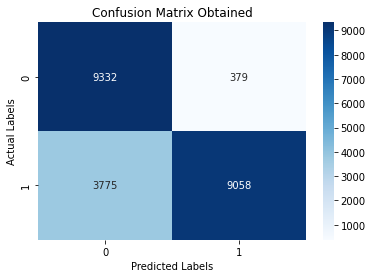

Accuarcy value obtained is  0.8157
F1-score obtained is  0.8135
Precision obtained is  0.9598
Recall obtained is  0.7058


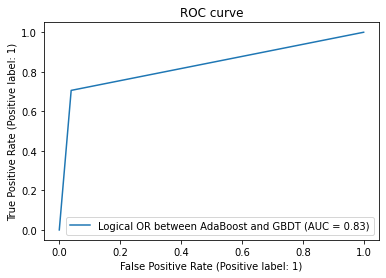

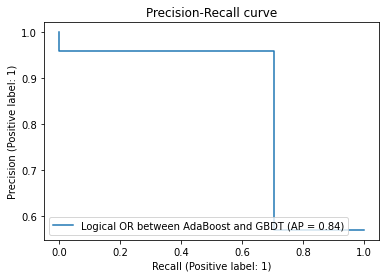

In [47]:
text = "Logical OR between AdaBoost and GBDT"
or_logic_stacking_list = [text]
or_logic_stacking_list.extend(print_metrics(processed_test_data_Y,test_predictions_ind_pca_or_df["AdaBoost OR GBDT"].values,text))
or_logic_stacking_table.append(or_logic_stacking_list)

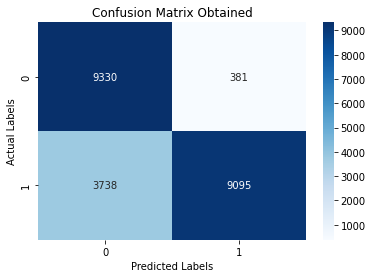

Accuarcy value obtained is  0.8173
F1-score obtained is  0.8154
Precision obtained is  0.9598
Recall obtained is  0.7087


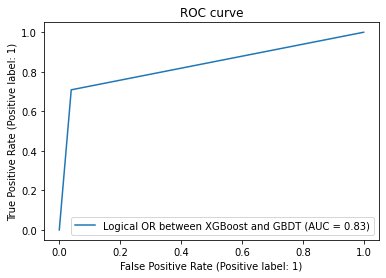

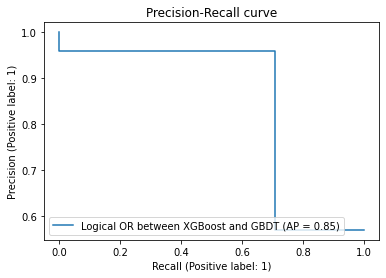

In [48]:
text = "Logical OR between XGBoost and GBDT"
or_logic_stacking_list = [text]
or_logic_stacking_list.extend(print_metrics(processed_test_data_Y,test_predictions_ind_pca_or_df["XGBoost OR GBDT"].values,text))
or_logic_stacking_table.append(or_logic_stacking_list)

In [49]:
or_logic_stacking_table

[['Logical OR between Random Forest and AdaBoost',
  0.8194,
  0.8178,
  0.9604,
  0.7121],
 ['Logical OR between Random Forest and XGBoost',
  0.8201,
  0.8186,
  0.9612,
  0.7128],
 ['Logical OR between Random Forest and GBDT', 0.8202, 0.8189, 0.9597, 0.7141],
 ['Logical OR between AdaBoost and XGBoost', 0.8168, 0.8147, 0.9604, 0.7073],
 ['Logical OR between AdaBoost and GBDT', 0.8157, 0.8135, 0.9598, 0.7058],
 ['Logical OR between XGBoost and GBDT', 0.8173, 0.8154, 0.9598, 0.7087]]

In [50]:
#Tabulating the obtained results and displaying the results by formatting
logical_or_df = pd.DataFrame(or_logic_stacking_table, columns = ["Logical OR between Classifiers","accuracy","f1-score","Precision","Recall"])
with pd.option_context('display.precision', 4):
    formatted_table=(logical_or_df.style.background_gradient(cmap ='RdYlGn'))
formatted_table

,Logical OR between Classifiers,accuracy,f1-score,Precision,Recall
0,Logical OR between Random Forest and AdaBoost,0.8194,0.8178,0.9604,0.7121
1,Logical OR between Random Forest and XGBoost,0.8201,0.8186,0.9612,0.7128
2,Logical OR between Random Forest and GBDT,0.8202,0.8189,0.9597,0.7141
3,Logical OR between AdaBoost and XGBoost,0.8168,0.8147,0.9604,0.7073
4,Logical OR between AdaBoost and GBDT,0.8157,0.8135,0.9598,0.7058
5,Logical OR between XGBoost and GBDT,0.8173,0.8154,0.9598,0.7087


In [51]:
ind_pca_or_table = []

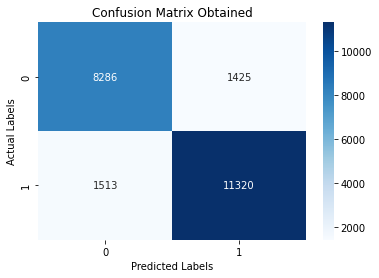

Accuarcy value obtained is  0.8697
F1-score obtained is  0.8851
Precision obtained is  0.8882
Recall obtained is  0.8821


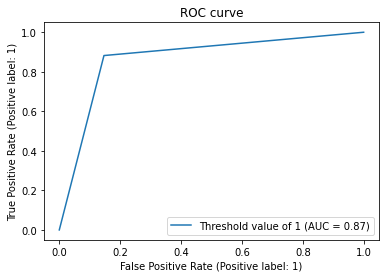

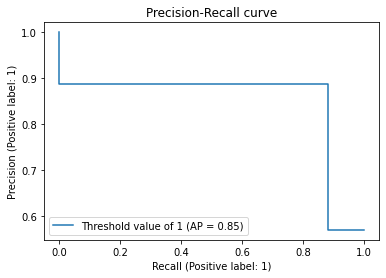

In [54]:
threshold = 1
test_predictions_ind_pca_or_df["final_prediction"] = test_predictions_ind_pca_or_df["sum_predictions"].apply(lambda x:1 if (x>=threshold) else 0)
ind_pca_or_list = ["Threshold value of {} while voting on various predictions".format(threshold)]
ind_pca_or_list.extend(print_metrics(processed_test_data_Y,test_predictions_ind_pca_or_df["final_prediction"].values,"Threshold value of {}".format(threshold)))
ind_pca_or_table.append(ind_pca_or_list)

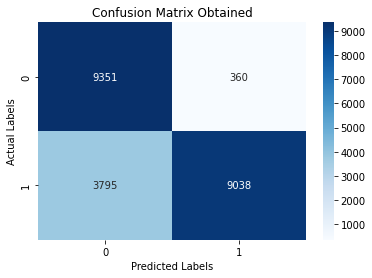

Accuarcy value obtained is  0.8157
F1-score obtained is  0.8131
Precision obtained is  0.9617
Recall obtained is  0.7043


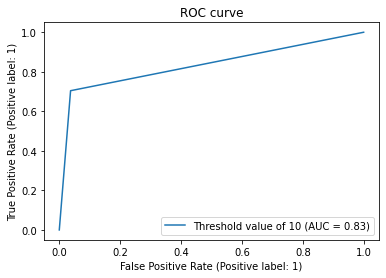

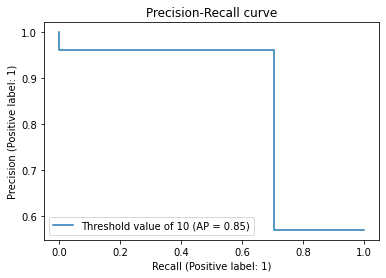

In [55]:
threshold = 10
test_predictions_ind_pca_or_df["final_prediction"] = test_predictions_ind_pca_or_df["sum_predictions"].apply(lambda x:1 if (x>=threshold) else 0)
ind_pca_or_list = ["Threshold value of {} while voting on various predictions".format(threshold)]
ind_pca_or_list.extend(print_metrics(processed_test_data_Y,test_predictions_ind_pca_or_df["final_prediction"].values,"Threshold value of {}".format(threshold)))
ind_pca_or_table.append(ind_pca_or_list)

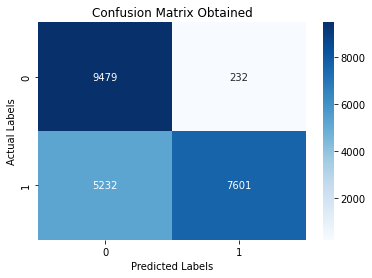

Accuarcy value obtained is  0.7576
F1-score obtained is  0.7356
Precision obtained is  0.9704
Recall obtained is  0.5923


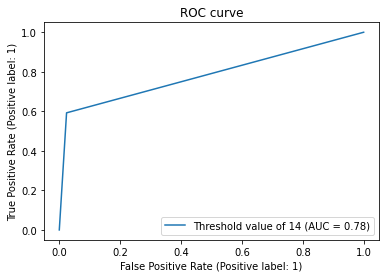

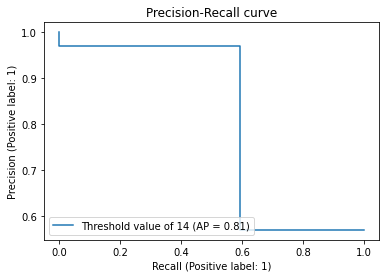

In [56]:
threshold = 14
test_predictions_ind_pca_or_df["final_prediction"] = test_predictions_ind_pca_or_df["sum_predictions"].apply(lambda x:1 if (x>=threshold) else 0)
ind_pca_or_list = ["Threshold value of {} while voting on various predictions".format(threshold)]
ind_pca_or_list.extend(print_metrics(processed_test_data_Y,test_predictions_ind_pca_or_df["final_prediction"].values,"Threshold value of {}".format(threshold)))
ind_pca_or_table.append(ind_pca_or_list)

In [57]:
ind_pca_or_table

[['Threshold value of 1 while voting on various predictions',
  0.8697,
  0.8851,
  0.8882,
  0.8821],
 ['Threshold value of 10 while voting on various predictions',
  0.8157,
  0.8131,
  0.9617,
  0.7043],
 ['Threshold value of 14 while voting on various predictions',
  0.7576,
  0.7356,
  0.9704,
  0.5923]]

In [58]:
#Tabulating the obtained results and displaying the results by formatting
ind_pca_or_table_df = pd.DataFrame(ind_pca_or_table, columns = ["Threshold value","accuracy","f1-score","Precision","Recall"])
with pd.option_context('display.precision', 4):
    formatted_table=(ind_pca_or_table_df.style.background_gradient(cmap ='RdYlGn'))
formatted_table

,Threshold value,accuracy,f1-score,Precision,Recall
0,Threshold value of 1 while voting on various predictions,0.8697,0.8851,0.8882,0.8821
1,Threshold value of 10 while voting on various predictions,0.8157,0.8131,0.9617,0.7043
2,Threshold value of 14 while voting on various predictions,0.7576,0.7356,0.9704,0.5923


Logical AND between Stacking Classifiers and deriving threshold for Voting

In [59]:
def utility_logical_and(col_a, col_b):
    output = []
    for a, b in zip(col_a, col_b):
        if (a==1 and b==1):
            output.append(1)
        else:
            output.append(0)
    return output

In [60]:
train_predictions_ind_pca_and_df = pd.DataFrame()
train_predictions_ind_pca_and_df["Naive Bayes - Base Learner"] = train_predictions_ind_pca_or_df["Naive Bayes - Base Learner"]
train_predictions_ind_pca_and_df["Decision Tree - Base Learner"] = train_predictions_ind_pca_or_df["Decision Tree - Base Learner"]
train_predictions_ind_pca_and_df["Logistic Regression - Base Learner"] = train_predictions_ind_pca_or_df["Logistic Regression - Base Learner"]
train_predictions_ind_pca_and_df["K Nearest Neighbors - Base Learner"] = train_predictions_ind_pca_or_df["K Nearest Neighbors - Base Learner"]
train_predictions_ind_pca_and_df["Random Forest - Stacking Classifier"] = train_predictions_ind_pca_or_df["Random Forest - Stacking Classifier"]
train_predictions_ind_pca_and_df["AdaBoost - Stacking Classifier"] = train_predictions_ind_pca_or_df["AdaBoost - Stacking Classifier"]
train_predictions_ind_pca_and_df["XGBoost - Stacking Classifier"] = train_predictions_ind_pca_or_df["XGBoost - Stacking Classifier"]
train_predictions_ind_pca_and_df["Gradient-Boosted Decision Tree - Stacking Classifier"] = train_predictions_ind_pca_or_df["Gradient-Boosted Decision Tree - Stacking Classifier"]
train_predictions_ind_pca_and_df["RF AND AdaBoost"] = utility_logical_and(train_predictions_ind_pca_and_df["Random Forest - Stacking Classifier"].values,train_predictions_ind_pca_and_df["AdaBoost - Stacking Classifier"].values)
train_predictions_ind_pca_and_df["RF AND XGBoost"] = utility_logical_and(train_predictions_ind_pca_and_df["Random Forest - Stacking Classifier"].values,train_predictions_ind_pca_and_df["XGBoost - Stacking Classifier"].values)
train_predictions_ind_pca_and_df["RF AND GBDT"] = utility_logical_and(train_predictions_ind_pca_and_df["Random Forest - Stacking Classifier"].values,train_predictions_ind_pca_and_df["Gradient-Boosted Decision Tree - Stacking Classifier"].values)
train_predictions_ind_pca_and_df["AdaBoost AND XGBoost"] = utility_logical_and(train_predictions_ind_pca_and_df["AdaBoost - Stacking Classifier"].values,train_predictions_ind_pca_and_df["XGBoost - Stacking Classifier"].values)
train_predictions_ind_pca_and_df["AdaBoost AND GBDT"] = utility_logical_and(train_predictions_ind_pca_and_df["AdaBoost - Stacking Classifier"].values,train_predictions_ind_pca_and_df["Gradient-Boosted Decision Tree - Stacking Classifier"].values)
train_predictions_ind_pca_and_df["XGBoost AND GBDT"] = utility_logical_and(train_predictions_ind_pca_and_df["XGBoost - Stacking Classifier"].values,train_predictions_ind_pca_and_df["Gradient-Boosted Decision Tree - Stacking Classifier"].values)

In [61]:
train_predictions_ind_pca_and_df

,Naive Bayes - Base Learner,Decision Tree - Base Learner,Logistic Regression - Base Learner,K Nearest Neighbors - Base Learner,Random Forest - Stacking Classifier,AdaBoost - Stacking Classifier,XGBoost - Stacking Classifier,Gradient-Boosted Decision Tree - Stacking Classifier,RF AND AdaBoost,RF AND XGBoost,RF AND GBDT,AdaBoost AND XGBoost,AdaBoost AND GBDT,XGBoost AND GBDT
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1,1,1,1,1,1,1,1,1,1,1,1,1,1
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129736,1,1,1,1,1,1,1,1,1,1,1,1,1,1
129737,1,1,1,1,1,1,1,1,1,1,1,1,1,1
129738,1,1,1,1,1,1,1,1,1,1,1,1,1,1
129739,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [62]:
train_predictions_ind_pca_and_df["sum_predictions"] = train_predictions_ind_pca_and_df.sum(axis=1)

100%|██████████| 14/14 [00:01<00:00,  7.62it/s]


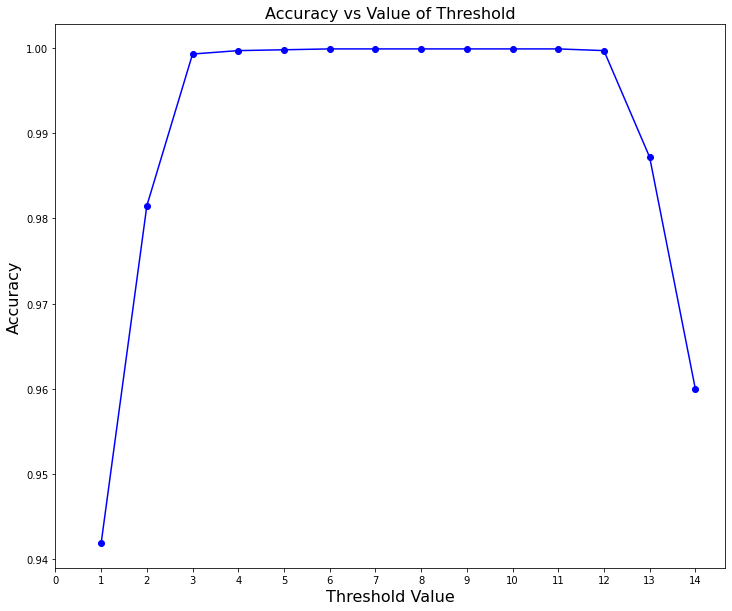

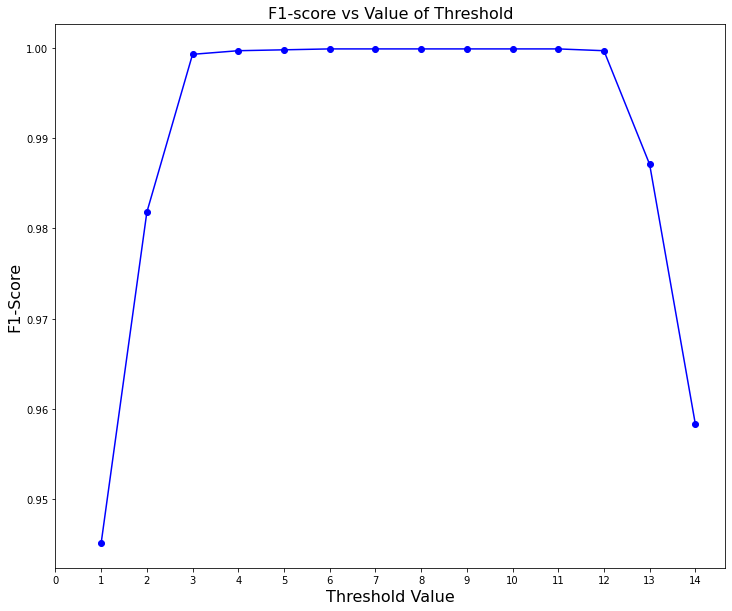

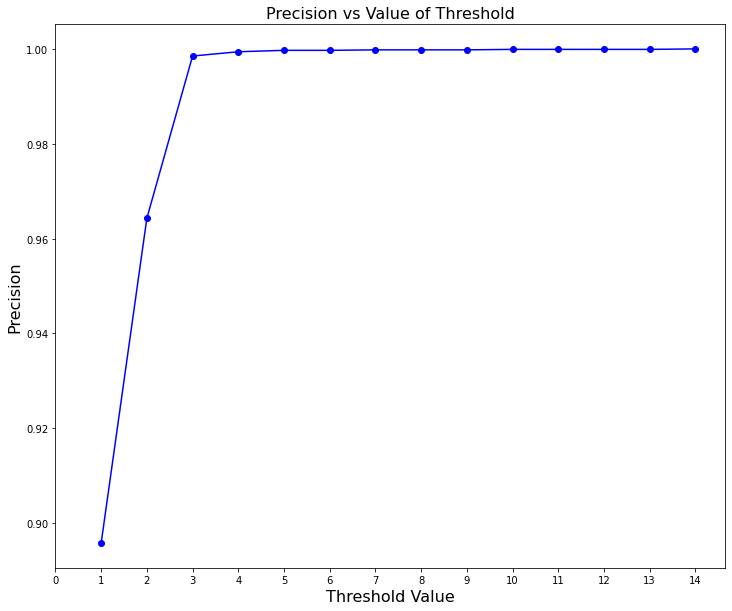

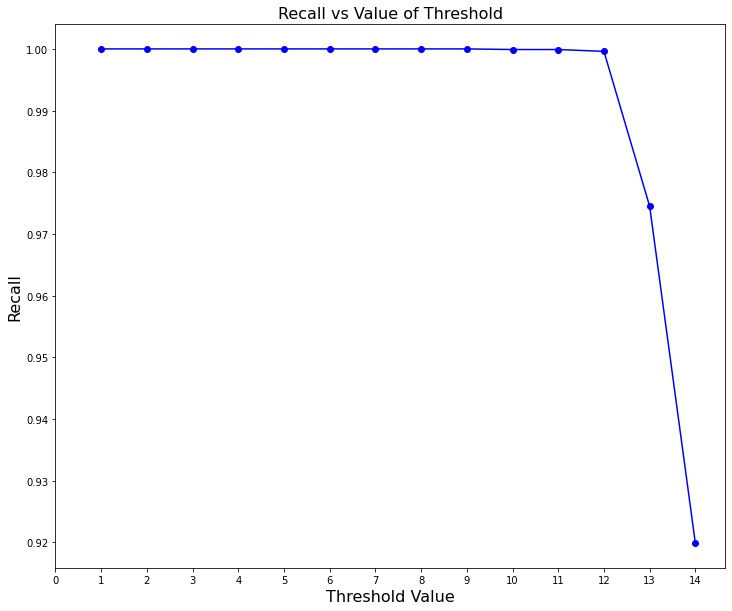

Maximum accuracy obtained is 0.9999 for the threshold value = 6
Maximum f1-score obtained is 0.9999 for the threshold value = 6
Maximum precision obtained is 1.0 for the threshold value = 14
Maximum recall obtained is 1.0 for the threshold value = 1


In [63]:
acc_dict = {}
f1_dict = {}
prec_dict = {}
recall_dict = {}
for threshold in tqdm(range(1,15)):
    acc_val = []
    f1_val = []
    prec_val = []
    recall_val = []
    yPred = train_predictions_ind_pca_and_df["sum_predictions"].apply(lambda x:1 if (x>=threshold) else 0)
    acc_dict[threshold] = round(accuracy_score(processed_adasyn_train_data_trY,yPred),4)
    f1_dict[threshold] = round(f1_score(processed_adasyn_train_data_trY,yPred,labels=np.unique(yPred)),4) 
    prec_dict[threshold] = round(precision_score(processed_adasyn_train_data_trY,yPred,labels=np.unique(yPred)),4)
    recall_dict[threshold] = round(recall_score(processed_adasyn_train_data_trY,yPred,labels=np.unique(yPred)),4)
    
plt.figure(figsize=(12,10))
plt.plot(*zip(*sorted(acc_dict.items())),color='blue',marker='o')
Title = "Accuracy vs Value of Threshold"
plt.title(Title, fontsize=16)
plt.xticks(range(0,15))
plt.xlabel("Threshold Value", fontsize=16)
plt.ylabel("Accuracy", fontsize=16)
plt.show();

plt.figure(figsize=(12,10))
plt.plot(*zip(*sorted(f1_dict.items())),color='blue',marker='o')
Title = "F1-score vs Value of Threshold"
plt.title(Title, fontsize=16)
plt.xticks(range(0,15))
plt.xlabel("Threshold Value", fontsize=16)
plt.ylabel("F1-Score", fontsize=16)
plt.show();


plt.figure(figsize=(12,10))
plt.plot(*zip(*sorted(prec_dict.items())),color='blue',marker='o')
Title = "Precision vs Value of Threshold"
plt.title(Title, fontsize=16)
plt.xticks(range(0,15))
plt.xlabel("Threshold Value", fontsize=16)
plt.ylabel("Precision", fontsize=16)
plt.show();

plt.figure(figsize=(12,10))
plt.plot(*zip(*sorted(recall_dict.items())),color='blue',marker='o')
Title = "Recall vs Value of Threshold"
plt.title(Title, fontsize=16)
plt.xticks(range(0,15))
plt.xlabel("Threshold Value", fontsize=16)
plt.ylabel("Recall", fontsize=16)
plt.show();

max_acc = max(acc_dict.values())
max_acc_threshold =  max(acc_dict, key=acc_dict.get)

max_f1 = max(f1_dict.values())
max_f1_threshold=  max(f1_dict, key=f1_dict.get)

max_precision = max(prec_dict.values())
max_prec_threshold = max(prec_dict, key=prec_dict.get)

max_recall = max(recall_dict.values())
max_recall_threshold = max(recall_dict, key=recall_dict.get)


print("Maximum accuracy obtained is {} for the threshold value = {}".format(max_acc,max_acc_threshold))
print("Maximum f1-score obtained is {} for the threshold value = {}".format(max_f1,max_f1_threshold))
print("Maximum precision obtained is {} for the threshold value = {}".format(max_precision,max_prec_threshold))
print("Maximum recall obtained is {} for the threshold value = {}".format(max_recall,max_recall_threshold))

In [64]:
threshold = 1
print("Accuracy at threshold value {} is {}".format(threshold,acc_dict[threshold]))
print("F1-Score at threshold value {} is {}".format(threshold,f1_dict[threshold]))
print("Precision at threshold value {} is {}".format(threshold,prec_dict[threshold]))
print("Recall at threshold value {} is {}".format(threshold,recall_dict[threshold]))

Accuracy at threshold value 1 is 0.9419
F1-Score at threshold value 1 is 0.9451
Precision at threshold value 1 is 0.8958
Recall at threshold value 1 is 1.0


In [65]:
threshold = 6
print("Accuracy at threshold value {} is {}".format(threshold,acc_dict[threshold]))
print("F1-Score at threshold value {} is {}".format(threshold,f1_dict[threshold]))
print("Precision at threshold value {} is {}".format(threshold,prec_dict[threshold]))
print("Recall at threshold value {} is {}".format(threshold,recall_dict[threshold]))

Accuracy at threshold value 6 is 0.9999
F1-Score at threshold value 6 is 0.9999
Precision at threshold value 6 is 0.9997
Recall at threshold value 6 is 1.0


In [66]:
threshold = 14
print("Accuracy at threshold value {} is {}".format(threshold,acc_dict[threshold]))
print("F1-Score at threshold value {} is {}".format(threshold,f1_dict[threshold]))
print("Precision at threshold value {} is {}".format(threshold,prec_dict[threshold]))
print("Recall at threshold value {} is {}".format(threshold,recall_dict[threshold]))

Accuracy at threshold value 14 is 0.96
F1-Score at threshold value 14 is 0.9583
Precision at threshold value 14 is 1.0
Recall at threshold value 14 is 0.9199


In [67]:
test_predictions_ind_pca_and_df = pd.DataFrame()
test_predictions_ind_pca_and_df["Naive Bayes - Base Learner"] = gnb_pca_pipeline_yPred
test_predictions_ind_pca_and_df["Decision Tree - Base Learner"] = dt_pca_pipeline_yPred
test_predictions_ind_pca_and_df["Logistic Regression - Base Learner"] = logreg_pca_pipeline_yPred
test_predictions_ind_pca_and_df["K Nearest Neighbors - Base Learner"] = knn_pca_pipeline_yPred
test_predictions_ind_pca_and_df["Random Forest - Stacking Classifier"] = stack_results["RandomForestClassifier_yPred"]
test_predictions_ind_pca_and_df["AdaBoost - Stacking Classifier"] = stack_results["AdaBoostClassifier_yPred"]
test_predictions_ind_pca_and_df["XGBoost - Stacking Classifier"] = stack_results["XGBClassifier_yPred"]
test_predictions_ind_pca_and_df["Gradient-Boosted Decision Tree - Stacking Classifier"] = stack_results["GradientBoostingClassifier_yPred"]
test_predictions_ind_pca_and_df["RF AND AdaBoost"] = utility_logical_and(test_predictions_ind_pca_and_df["Random Forest - Stacking Classifier"].values,test_predictions_ind_pca_and_df["AdaBoost - Stacking Classifier"].values)
test_predictions_ind_pca_and_df["RF AND XGBoost"] = utility_logical_and(test_predictions_ind_pca_and_df["Random Forest - Stacking Classifier"].values,test_predictions_ind_pca_and_df["XGBoost - Stacking Classifier"].values)
test_predictions_ind_pca_and_df["RF AND GBDT"] = utility_logical_and(test_predictions_ind_pca_and_df["Random Forest - Stacking Classifier"].values,test_predictions_ind_pca_and_df["Gradient-Boosted Decision Tree - Stacking Classifier"].values)
test_predictions_ind_pca_and_df["AdaBoost AND XGBoost"] = utility_logical_and(test_predictions_ind_pca_and_df["AdaBoost - Stacking Classifier"].values,test_predictions_ind_pca_and_df["XGBoost - Stacking Classifier"].values)
test_predictions_ind_pca_and_df["AdaBoost AND GBDT"] = utility_logical_and(test_predictions_ind_pca_and_df["AdaBoost - Stacking Classifier"].values,test_predictions_ind_pca_and_df["Gradient-Boosted Decision Tree - Stacking Classifier"].values)
test_predictions_ind_pca_and_df["XGBoost AND GBDT"] = utility_logical_and(test_predictions_ind_pca_and_df["XGBoost - Stacking Classifier"].values,test_predictions_ind_pca_and_df["Gradient-Boosted Decision Tree - Stacking Classifier"].values)

test_predictions_ind_pca_and_df["sum_predictions"] = test_predictions_ind_pca_and_df.sum(axis=1)

In [68]:
and_logic_stacking_table = []

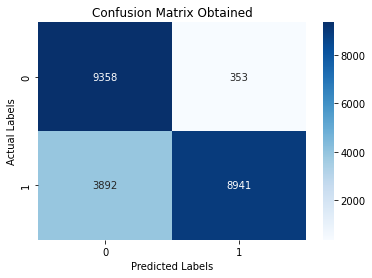

Accuarcy value obtained is  0.8117
F1-score obtained is  0.8082
Precision obtained is  0.962
Recall obtained is  0.6967


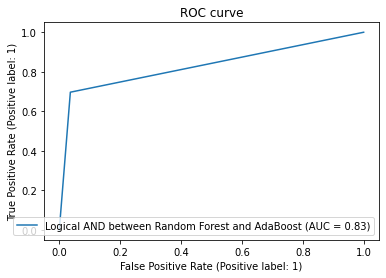

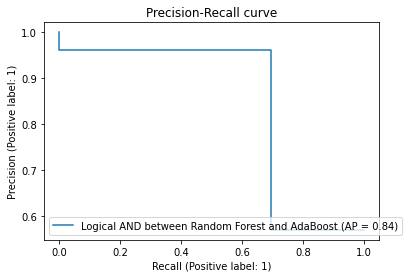

In [69]:
text = "Logical AND between Random Forest and AdaBoost"
and_logic_stacking_list = [text]
and_logic_stacking_list.extend(print_metrics(processed_test_data_Y,test_predictions_ind_pca_and_df["RF AND AdaBoost"].values,text))
and_logic_stacking_table.append(and_logic_stacking_list)

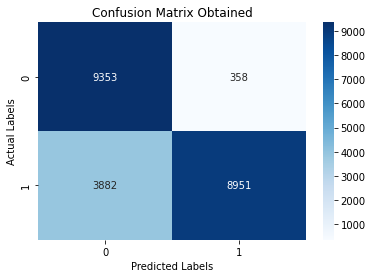

Accuarcy value obtained is  0.8119
F1-score obtained is  0.8085
Precision obtained is  0.9615
Recall obtained is  0.6975


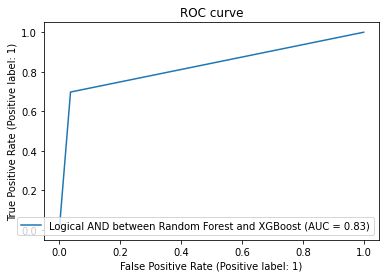

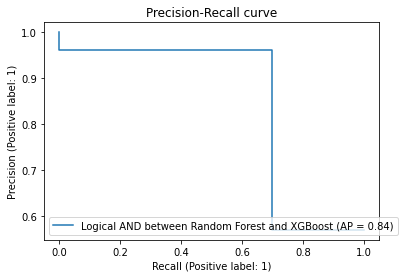

In [70]:
text = "Logical AND between Random Forest and XGBoost"
and_logic_stacking_list = [text]
and_logic_stacking_list.extend(print_metrics(processed_test_data_Y,test_predictions_ind_pca_and_df["RF AND XGBoost"].values,text))
and_logic_stacking_table.append(and_logic_stacking_list)

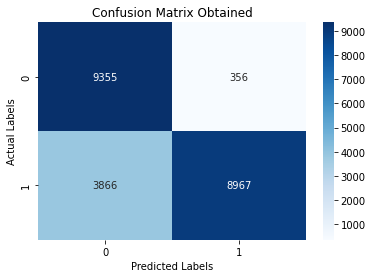

Accuarcy value obtained is  0.8127
F1-score obtained is  0.8094
Precision obtained is  0.9618
Recall obtained is  0.6987


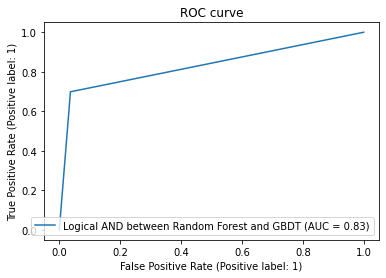

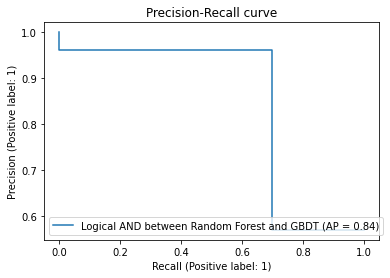

In [71]:
text = "Logical AND between Random Forest and GBDT"
and_logic_stacking_list = [text]
and_logic_stacking_list.extend(print_metrics(processed_test_data_Y,test_predictions_ind_pca_and_df["RF AND GBDT"].values,text))
and_logic_stacking_table.append(and_logic_stacking_list)

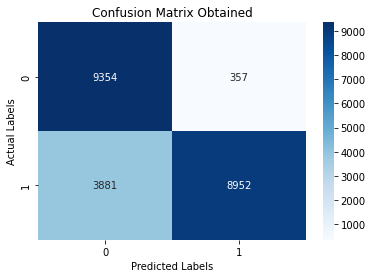

Accuarcy value obtained is  0.812
F1-score obtained is  0.8086
Precision obtained is  0.9617
Recall obtained is  0.6976


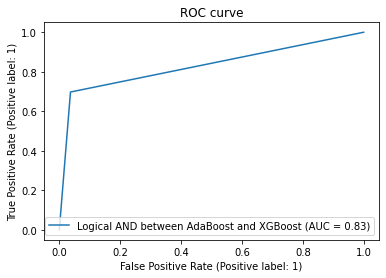

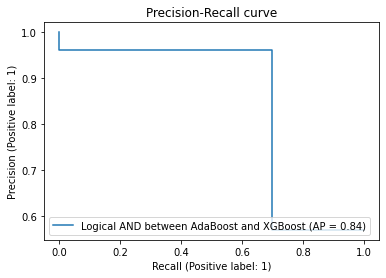

In [72]:
text = "Logical AND between AdaBoost and XGBoost"
and_logic_stacking_list = [text]
and_logic_stacking_list.extend(print_metrics(processed_test_data_Y,test_predictions_ind_pca_and_df["AdaBoost AND XGBoost"].values,text))
and_logic_stacking_table.append(and_logic_stacking_list)

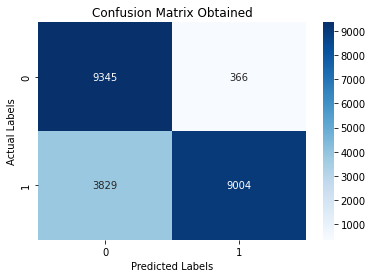

Accuarcy value obtained is  0.8139
F1-score obtained is  0.8111
Precision obtained is  0.9609
Recall obtained is  0.7016


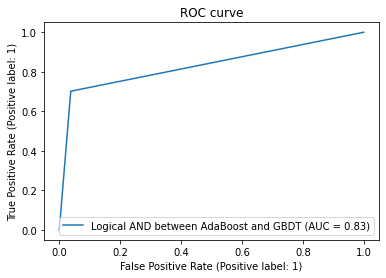

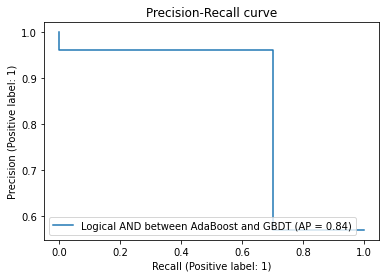

In [73]:
text = "Logical AND between AdaBoost and GBDT"
and_logic_stacking_list = [text]
and_logic_stacking_list.extend(print_metrics(processed_test_data_Y,test_predictions_ind_pca_and_df["AdaBoost AND GBDT"].values,text))
and_logic_stacking_table.append(and_logic_stacking_list)

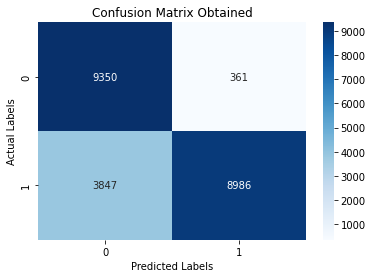

Accuarcy value obtained is  0.8133
F1-score obtained is  0.8103
Precision obtained is  0.9614
Recall obtained is  0.7002


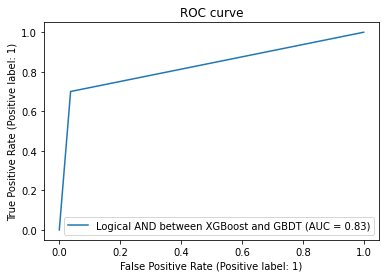

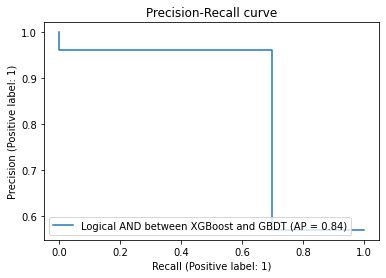

In [74]:
text = "Logical AND between XGBoost and GBDT"
and_logic_stacking_list = [text]
and_logic_stacking_list.extend(print_metrics(processed_test_data_Y,test_predictions_ind_pca_and_df["XGBoost AND GBDT"].values,text))
and_logic_stacking_table.append(and_logic_stacking_list)

In [75]:
and_logic_stacking_table

[['Logical AND between Random Forest and AdaBoost',
  0.8117,
  0.8082,
  0.962,
  0.6967],
 ['Logical AND between Random Forest and XGBoost',
  0.8119,
  0.8085,
  0.9615,
  0.6975],
 ['Logical AND between Random Forest and GBDT',
  0.8127,
  0.8094,
  0.9618,
  0.6987],
 ['Logical AND between AdaBoost and XGBoost', 0.812, 0.8086, 0.9617, 0.6976],
 ['Logical AND between AdaBoost and GBDT', 0.8139, 0.8111, 0.9609, 0.7016],
 ['Logical AND between XGBoost and GBDT', 0.8133, 0.8103, 0.9614, 0.7002]]

In [76]:
#Tabulating the obtained results and displaying the results by formatting
logical_and_df = pd.DataFrame(and_logic_stacking_table, columns = ["Logical AND between Classifiers","accuracy","f1-score","Precision","Recall"])
with pd.option_context('display.precision', 4):
    formatted_table=(logical_and_df.style.background_gradient(cmap ='RdYlGn'))
formatted_table

,Logical AND between Classifiers,accuracy,f1-score,Precision,Recall
0,Logical AND between Random Forest and AdaBoost,0.8117,0.8082,0.9620,0.6967
1,Logical AND between Random Forest and XGBoost,0.8119,0.8085,0.9615,0.6975
2,Logical AND between Random Forest and GBDT,0.8127,0.8094,0.9618,0.6987
3,Logical AND between AdaBoost and XGBoost,0.8120,0.8086,0.9617,0.6976
4,Logical AND between AdaBoost and GBDT,0.8139,0.8111,0.9609,0.7016
5,Logical AND between XGBoost and GBDT,0.8133,0.8103,0.9614,0.7002


In [77]:
ind_pca_and_table = []

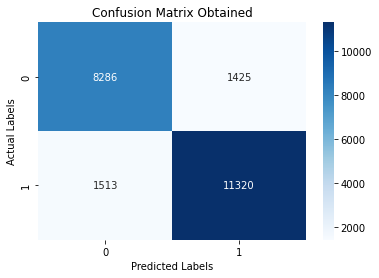

Accuarcy value obtained is  0.8697
F1-score obtained is  0.8851
Precision obtained is  0.8882
Recall obtained is  0.8821


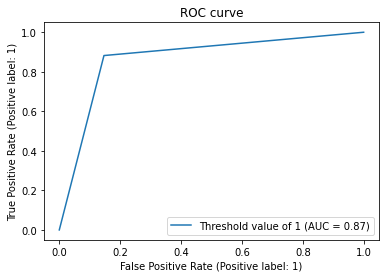

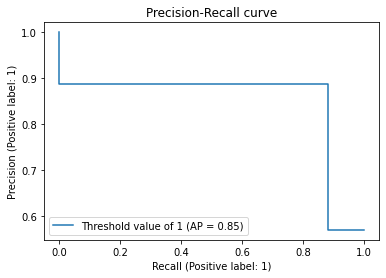

In [78]:
threshold = 1
test_predictions_ind_pca_and_df["final_prediction"] = test_predictions_ind_pca_and_df["sum_predictions"].apply(lambda x:1 if (x>=threshold) else 0)
ind_pca_and_list = ["Threshold value of {} while voting on various predictions".format(threshold)]
ind_pca_and_list.extend(print_metrics(processed_test_data_Y,test_predictions_ind_pca_and_df["final_prediction"].values,"Threshold value of {}".format(threshold)))
ind_pca_and_table.append(ind_pca_and_list)

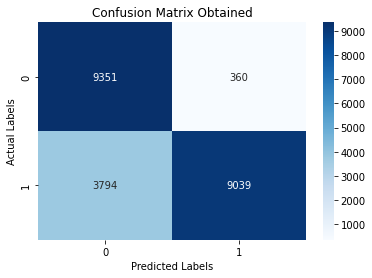

Accuarcy value obtained is  0.8157
F1-score obtained is  0.8132
Precision obtained is  0.9617
Recall obtained is  0.7044


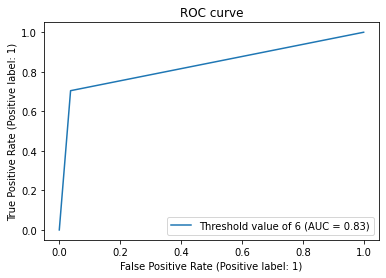

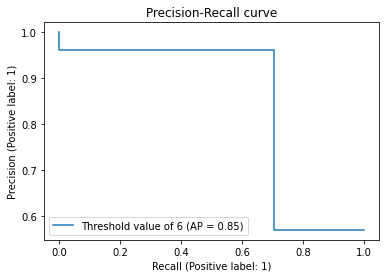

In [79]:
threshold = 6
test_predictions_ind_pca_and_df["final_prediction"] = test_predictions_ind_pca_and_df["sum_predictions"].apply(lambda x:1 if (x>=threshold) else 0)
ind_pca_and_list = ["Threshold value of {} while voting on various predictions".format(threshold)]
ind_pca_and_list.extend(print_metrics(processed_test_data_Y,test_predictions_ind_pca_and_df["final_prediction"].values,"Threshold value of {}".format(threshold)))
ind_pca_and_table.append(ind_pca_and_list)

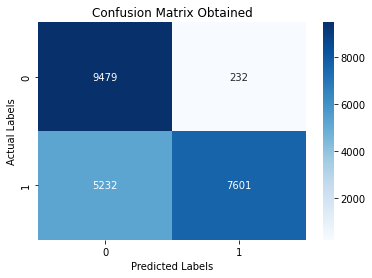

Accuarcy value obtained is  0.7576
F1-score obtained is  0.7356
Precision obtained is  0.9704
Recall obtained is  0.5923


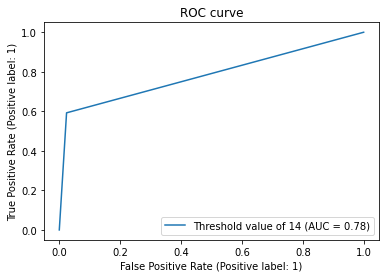

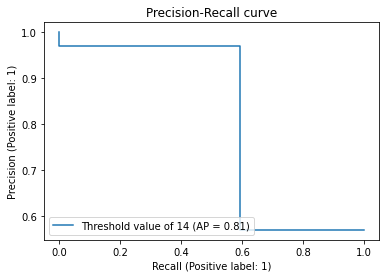

In [80]:
threshold = 14
test_predictions_ind_pca_and_df["final_prediction"] = test_predictions_ind_pca_and_df["sum_predictions"].apply(lambda x:1 if (x>=threshold) else 0)
ind_pca_and_list = ["Threshold value of {} while voting on various predictions".format(threshold)]
ind_pca_and_list.extend(print_metrics(processed_test_data_Y,test_predictions_ind_pca_and_df["final_prediction"].values,"Threshold value of {}".format(threshold)))
ind_pca_and_table.append(ind_pca_and_list)

In [81]:
ind_pca_and_table

[['Threshold value of 1 while voting on various predictions',
  0.8697,
  0.8851,
  0.8882,
  0.8821],
 ['Threshold value of 6 while voting on various predictions',
  0.8157,
  0.8132,
  0.9617,
  0.7044],
 ['Threshold value of 14 while voting on various predictions',
  0.7576,
  0.7356,
  0.9704,
  0.5923]]

In [82]:
#Tabulating the obtained results and displaying the results by formatting
ind_pca_and_table_df = pd.DataFrame(ind_pca_and_table, columns = ["Threshold value","accuracy","f1-score","Precision","Recall"])
with pd.option_context('display.precision', 4):
    formatted_table=(ind_pca_and_table_df.style.background_gradient(cmap ='RdYlGn'))
formatted_table

,Threshold value,accuracy,f1-score,Precision,Recall
0,Threshold value of 1 while voting on various predictions,0.8697,0.8851,0.8882,0.8821
1,Threshold value of 6 while voting on various predictions,0.8157,0.8132,0.9617,0.7044
2,Threshold value of 14 while voting on various predictions,0.7576,0.7356,0.9704,0.5923
